# Common DataFrame Operations

Let's go ahead and import Pandas and import some data:

In [1]:
import pandas as pd

rows = [
['Aberdeen Township', 18150, 19, 0, 13, 6],
['Absecon', 8380, 21, 0, 4, 15],
['Allendale', 6712, 0, 0, 0, 0],
['Allenhurst', 493, 0, 0, 0, 0],
['Allentown', 1812, 3, 0, 0, 3],
['Alpine', 2314, 1, 0, 0, 1],
['Andover Township', 6273, 1, 0, 0, 1],
]
df = pd.DataFrame.from_records(rows, columns=['City', 'Population', 'Violent Crimes', 'Murders', 'Roberies', 'Aggrevated Assaults'])

df

,City,Population,Violent Crimes,Murders,Roberies,Aggrevated Assaults
0,Aberdeen Township,18150,19,0,13,6
1,Absecon,8380,21,0,4,15
2,Allendale,6712,0,0,0,0
3,Allenhurst,493,0,0,0,0
4,Allentown,1812,3,0,0,3
5,Alpine,2314,1,0,0,1
6,Andover Township,6273,1,0,0,1


We're going to demonstrate a few of the basic things Pandas can do with a `DataFrame`.
======

A complete list can be found [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

## Functions that Operate on the Entire DF

In [2]:
df.sum()

City                   Aberdeen TownshipAbseconAllendaleAllenhurstAll...
Population                                                         44134
Violent Crimes                                                        45
Murders                                                                0
Roberies                                                              17
Aggrevated Assaults                                                   26
dtype: object

## Grouping and Indexing

Sometimes, it's useful to group data.  Sometimes parts of that data aren't really data per se, but rather labels.  In our case, `City` is a label.  It looking at the previous cell, it doesn't make much sense to treat like data.  To handle this, Pandas gives us `index`es to express that some of these labels aren't meant to be operated on.

In [3]:
df = df.set_index(['City', ])

df

,Population,Violent Crimes,Murders,Roberies,Aggrevated Assaults
City,,,,,
Aberdeen Township,18150,19,0,13,6
Absecon,8380,21,0,4,15
Allendale,6712,0,0,0,0
Allenhurst,493,0,0,0,0
Allentown,1812,3,0,0,3
Alpine,2314,1,0,0,1
Andover Township,6273,1,0,0,1


In [4]:
df.sum()

Population             44134
Violent Crimes            45
Murders                    0
Roberies                  17
Aggrevated Assaults       26
dtype: int64

In [5]:
df['Cohort'] = df['Population'].apply(lambda x: 'A' if x > 5000 else 'B')

df

,Population,Violent Crimes,Murders,Roberies,Aggrevated Assaults,Cohort
City,,,,,,
Aberdeen Township,18150,19,0,13,6,A
Absecon,8380,21,0,4,15,A
Allendale,6712,0,0,0,0,A
Allenhurst,493,0,0,0,0,B
Allentown,1812,3,0,0,3,B
Alpine,2314,1,0,0,1,B
Andover Township,6273,1,0,0,1,A


In [6]:
df.groupby('Cohort').sum()

,Population,Violent Crimes,Murders,Roberies,Aggrevated Assaults
Cohort,,,,,
A,39515,41,0,17,22
B,4619,4,0,0,4


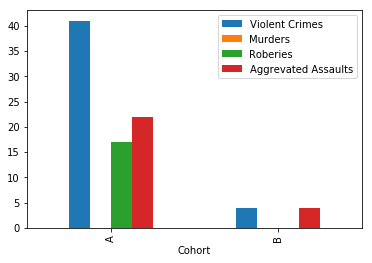

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

cohort_df = df.groupby('Cohort').sum()
cohort_df = cohort_df.drop('Population', axis=1)
cohort_df.plot(kind='bar')

In [9]:
df['Crime Rate Per Capita'] = df['Violent Crimes'] / df['Population']

df

,Population,Violent Crimes,Murders,Roberies,Aggrevated Assaults,Cohort,Crime Rate Per Capita
City,,,,,,,
Aberdeen Township,18150,19,0,13,6,A,0.001047
Absecon,8380,21,0,4,15,A,0.002506
Allendale,6712,0,0,0,0,A,0.000000
Allenhurst,493,0,0,0,0,B,0.000000
Allentown,1812,3,0,0,3,B,0.001656
Alpine,2314,1,0,0,1,B,0.000432
Andover Township,6273,1,0,0,1,A,0.000159


In [10]:
df = df[['Cohort', 'Crime Rate Per Capita']]

df

,Cohort,Crime Rate Per Capita
City,,
Aberdeen Township,A,0.001047
Absecon,A,0.002506
Allendale,A,0.000000
Allenhurst,B,0.000000
Allentown,B,0.001656
Alpine,B,0.000432
Andover Township,A,0.000159


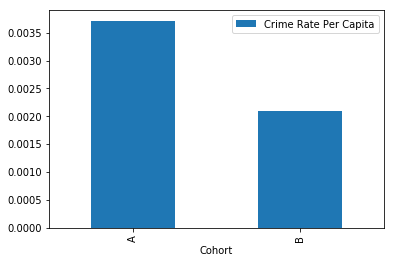

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

cohort_df = df.groupby('Cohort').sum()
cohort_df.plot(kind='bar')

![inline](koth.jpg)